# CAR PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns = ["car_ID", "symboling", "aspiration","drivewheel"], inplace =True)

In [12]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

{'whiskers': [<matplotlib.lines.Line2D at 0x19dd5a9c520>,
 'caps': [<matplotlib.lines.Line2D at 0x19dd5a9ca60>,
 'boxes': [<matplotlib.lines.Line2D at 0x19dd5a9c280>,
 'medians': [<matplotlib.lines.Line2D at 0x19dd5a9cfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19dd5ab8280>,
 'means': []}

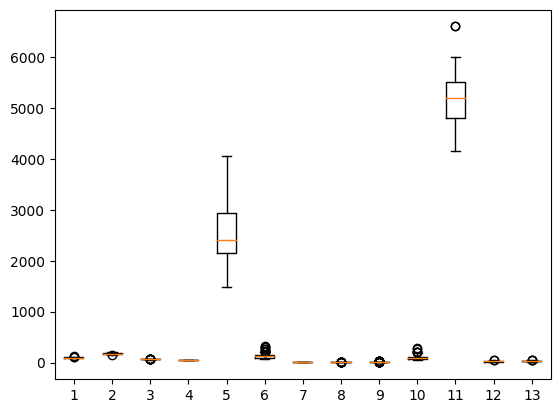

In [13]:
# Boxplot
plt.boxplot(df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])

In [14]:
# Outliers Removal
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method = "iqr",
                   fold = 1.5,
                   tail ="both",
                   variables =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'])

In [15]:
df = winsor.fit_transform(df[['CarName', 'fueltype', 'doornumber', 'carbody', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']])

In [16]:
# Label Encoder
from sklearn. preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df["CarName"] = le.fit_transform(df["CarName"])
df["fueltype"] = le.fit_transform(df["fueltype"])
df["doornumber"] = le.fit_transform(df["doornumber"])
df["carbody"] = le.fit_transform(df["carbody"])
df["enginelocation"] = le.fit_transform(df["enginelocation"])
df["fuelsystem"] = le.fit_transform(df["fuelsystem"])
df["enginetype"] = le.fit_transform(df["enginetype"])
df["cylindernumber"] = le.fit_transform(df["cylindernumber"])

In [19]:
df.head(5)

,CarName,fueltype,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,1,0,0,88.6,168.8,64.1,48.8,2548.0,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,1,1,0,0,88.6,168.8,64.1,48.8,2548.0,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,1,1,2,0,94.5,171.2,65.5,52.4,2823.0,...,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,1,0,3,0,99.8,176.6,66.2,54.3,2337.0,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,1,0,3,0,99.4,176.6,66.4,54.3,2824.0,...,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


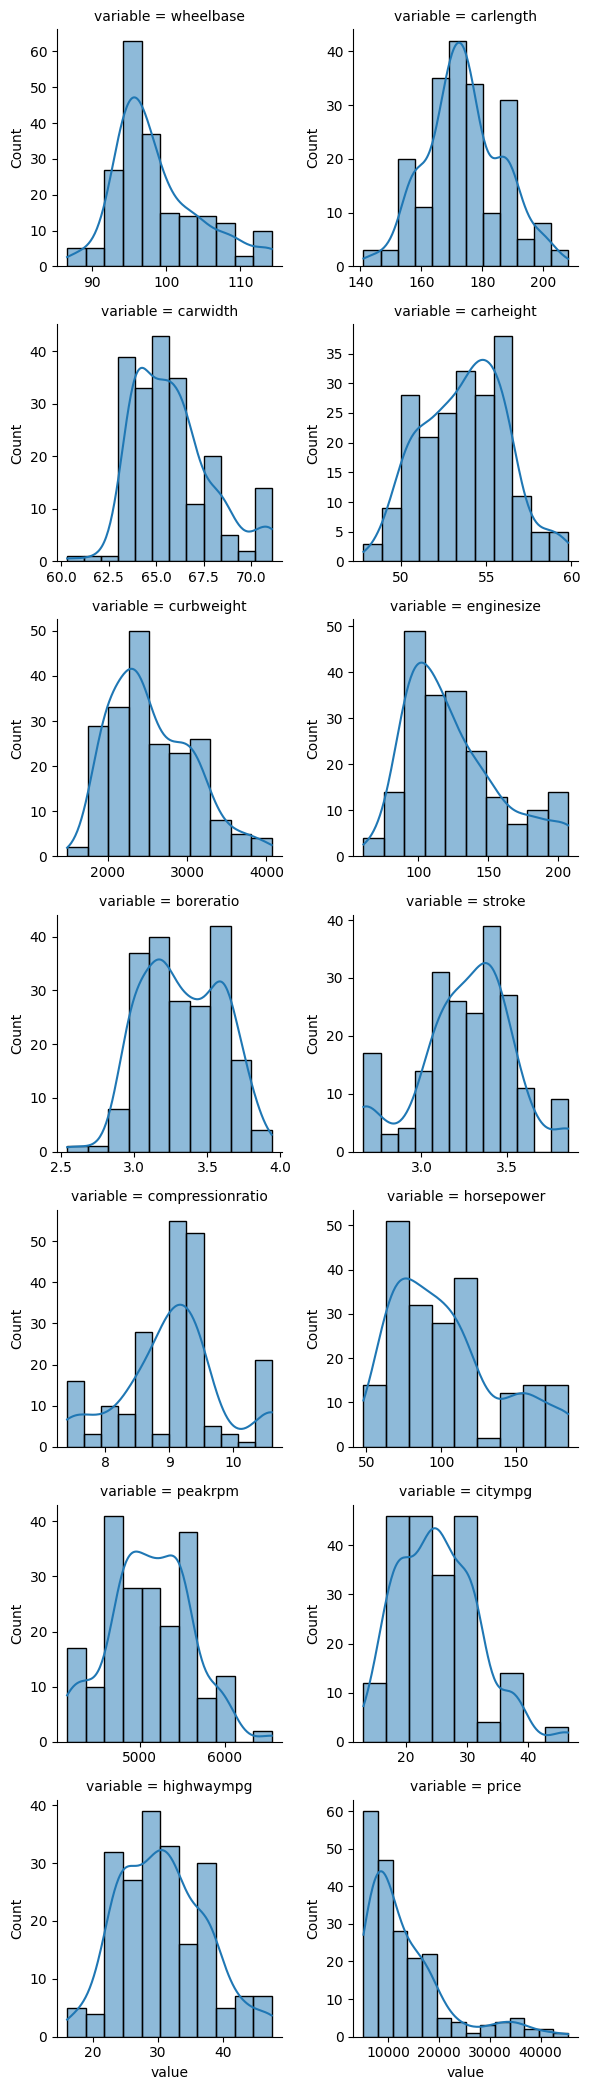

In [20]:
f = pd.melt(df, value_vars = num_columns)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False)
g = g.map(sns.histplot, "value", kde = True) 

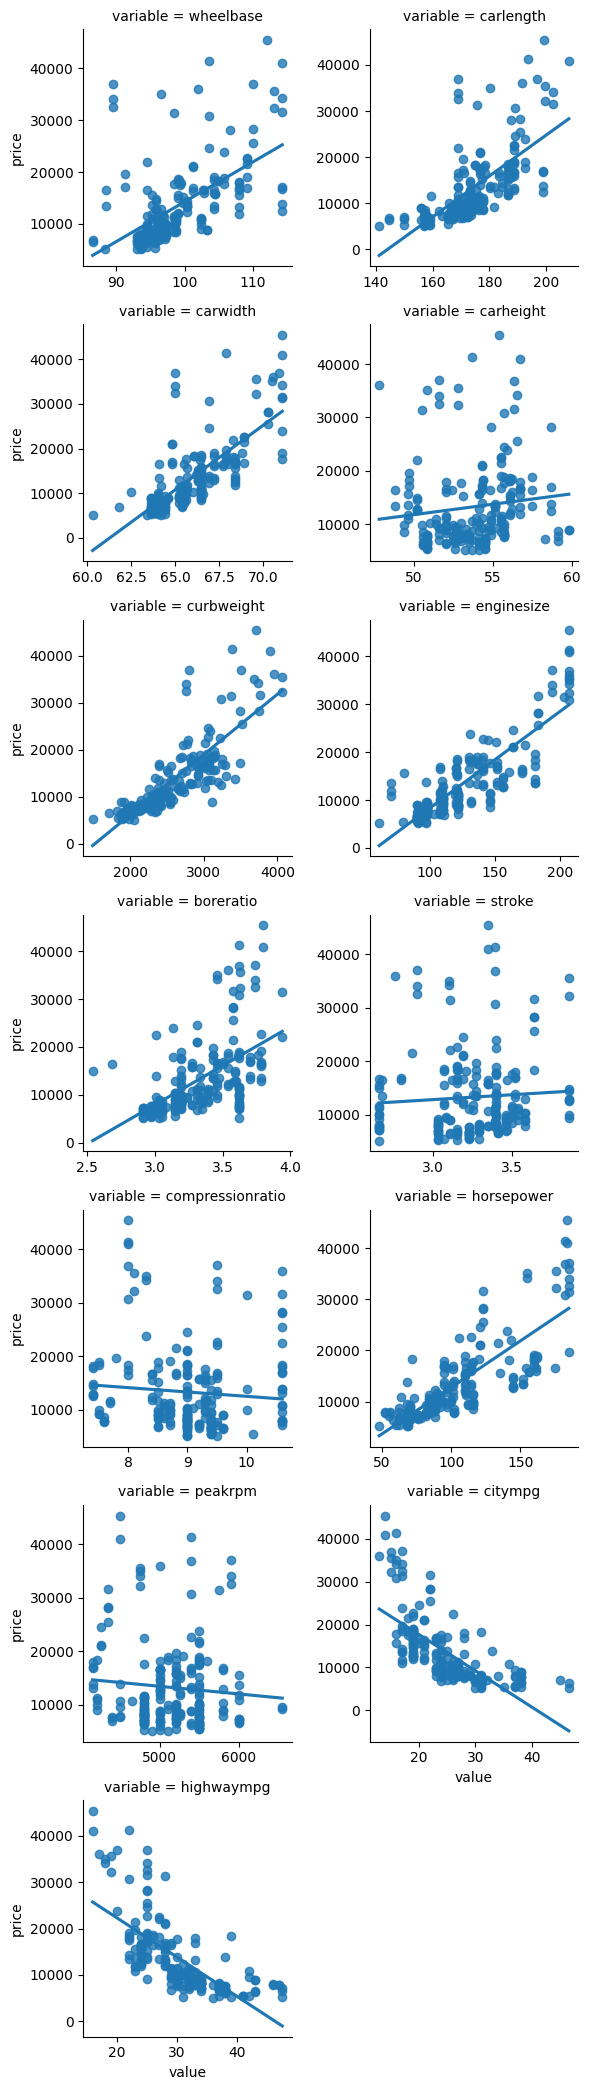

In [21]:
# Linear Graphs
def regplot(x, y, **kwargs):
    sns.regplot(x=x, y=y, ci=None)

f = pd.melt(df, id_vars=['price'], value_vars=num_columns[:-1])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(regplot, "value", "price")

<AxesSubplot: >

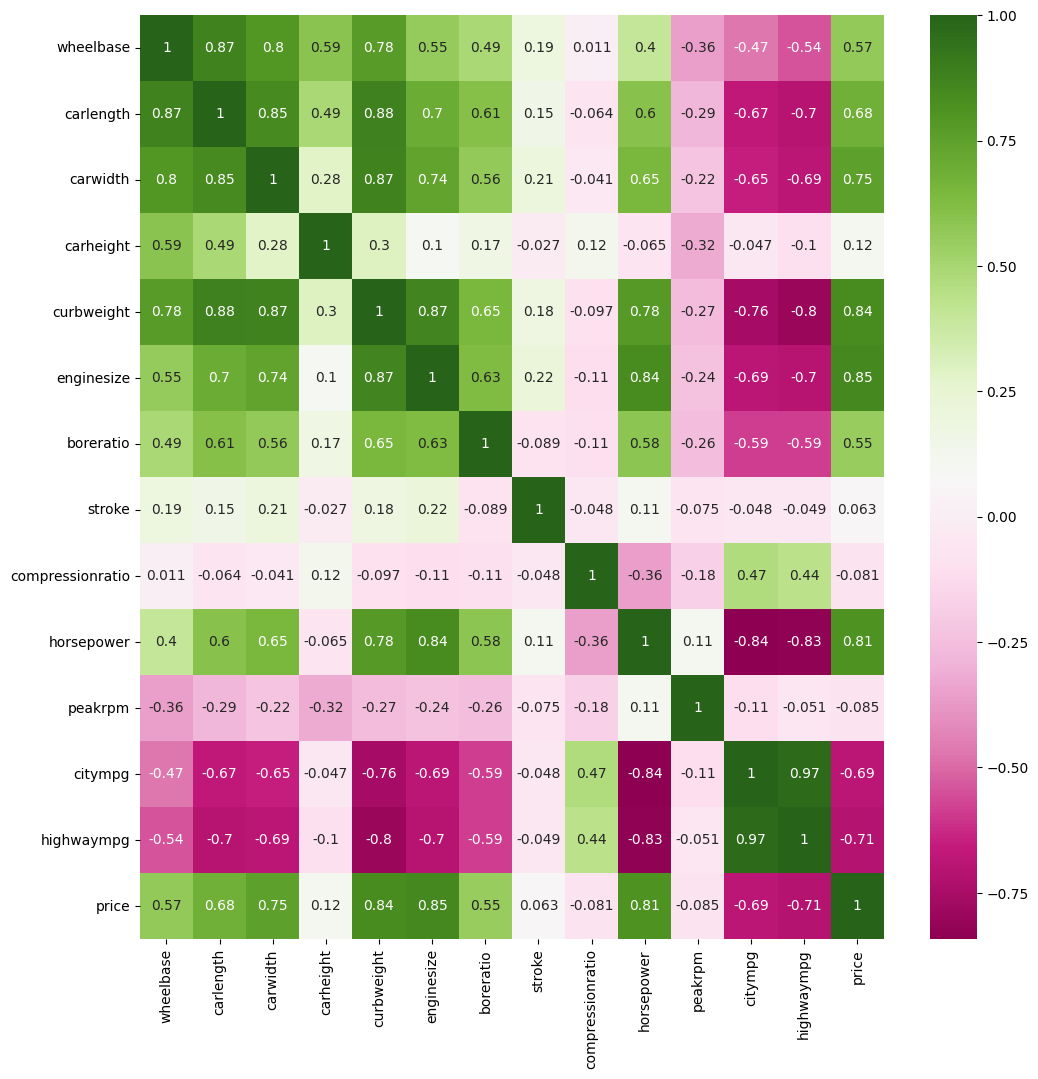

In [22]:
# Heatmap
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df[num_columns].corr(), cmap="PiYG", annot=True, ax =ax)

In [23]:
df.shape

(205, 22)

In [24]:
# Feature selection for training and testing

x = df.drop(columns = "price")

y = df["price"]

In [25]:
x.shape , y.shape

((205, 21), (205,))

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25, random_state = 30)

(x_train. shape, x_test.shape), (y_train.shape, y_test.shape)


(((153, 21), (52, 21)), ((153,), (52,)))

In [27]:
# linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
pred = model.fit(x_train, y_train)


In [28]:
x_train_pred = model.predict(x_train)

In [29]:
x_test_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_train,x_train_pred)*100

88.62742990251208

In [31]:
r2_score(y_test,x_test_pred)*100

83.64332724159705

### As we can see the train accuracy and test accuracy are nearly equivalent, So  the model fits well.

### With Linear regressor we got the r2 score as 88.62 for train data and 83.64 for test data

In [32]:
# Lets try Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

model_D = DecisionTreeRegressor()
pred_D = model_D.fit(x_train, y_train)

In [33]:
x_train_predD = model_D.predict(x_train)

In [34]:
x_test_predD = model_D.predict(x_test)

In [35]:
r2_score(y_train,x_train_predD)*100

100.0

In [36]:
r2_score(y_test,x_test_predD)*100

88.79006516969525

### With Decision Tree Regressor we got the r2 score as 100 for train data and 88.79 for test data

In [37]:
# Lets try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_R = RandomForestRegressor()
pred_R = model_R.fit(x_train, y_train)

In [38]:
x_train_predR = model_R.predict(x_train)

In [39]:
x_test_predR = model_R.predict(x_test)

In [40]:
r2_score(y_train,x_train_predR)*100

98.97303440321534

In [41]:
r2_score(y_test,x_test_predR)*100

93.15197933571098

### With Random Forest regressor we got the r2 score as 98.97 for train data and 93.15 for test data